In [315]:
import csv 
import random 
import networkx as nx
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline 
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 32}



plt.rc('font', **font) 

G0 = nx.read_weighted_edgelist("/home/achiso/MATH27/4932.protein.links.v12.0.txt",comments="#",nodetype=str) #Delete the header first or this might not work!
G0 

In [2]:
threshold_score = 700
for edge in G0.edges: 
    weight = list(G0.get_edge_data(edge[0],edge[1]).values())
    if(weight[0] <= threshold_score):
        G0.remove_edge(edge[0],edge[1])

print("( O v O)b") 

( O v O)b


In [ ]:
#draw   [ PASS ] 

In [3]:
print(G0.number_of_nodes())
largest_cc = max(nx.connected_components(G0) , key=len) 
Gc = G0.subgraph(largest_cc) 
print(Gc.number_of_nodes()) 

6538
5697


In [ ]:
#draw   [ PASS ] 

In [11]:
commus = nx.community.label_propagation_communities(Gc) 
print("commu # :" , len(commus))
modularity_v1 = nx.community.modularity(Gc , commus) 

print("modularity :" , modularity_v1) 


G = nx.Graph(Gc) 
for i in commus : 
    if len(i) < 11 : 
        for ii in i : 
            G.remove_node(ii) 
print("////////// REMOVAL ///////////") 
print("\t|G0| :" , G0.number_of_nodes()) 
print("\t|Gc| :" , Gc.number_of_nodes()) 
print("\t|G| :" , G.number_of_nodes()) 

newer_commus = nx.community.label_propagation_communities(G) 
modularity_v2 = nx.community.modularity(G , newer_commus) 

print("new modularity :" , modularity_v2) 

commu # : 334
modularity : 0.5368602914379882
////////// REMOVAL ///////////
	|G0| : 6538
	|Gc| : 5697
	|G| : 4637
new modularity : 0.544733466438132


In [372]:
def run_many_times(n=101 , G=G) : 
    run_records = [] 
    for i in range(n) : 
        random_number_in_range = random.randint(0 , 2**(64)-1) 
        rv = nx.community.fast_label_propagation_communities(G , seed=random_number_in_range) 
        rv_list = [] 
        
        
        for ii in rv : 
            rv_list.append(ii) 
        #for i in rv_list : 
        #    print(i) 
        
        run_records.append([rv_list , random_number_in_range]) 
        
        print("                    " , end='\r') 
        print("( O v O) {" , i+1 , ")" , end='\r') 

    
    return run_records 

In [56]:
def cal_rela_counters(runs , G=G) : 
    rela_c = {} 
    for i in G : 
        #rela_c.append( [i , [0]*len(G)] ) 
        rela_c[i] = [0]*len(G) 

    """   
    for i in runs : 
        for ii in G : 
            for iii in range(len(i[0])) : #result_i 
                if ii in i[0][iii] : 
                    for iiii in i[0][iii] : 
                        if ii == iiii : 
                            continue 
                        #rela_c[ii][1][iiii] += 1 
                        rela_c[ii][0] += 1 
    """
    return rela_c 

In [48]:
run_results = run_many_times(101) 

In [282]:
def top_btween_member(Gin , show=0) : 
    tmp_btweenCentra = nx.betweenness_centrality(Gin) 
    trig = 0 
    recov = "" 
    recoc = -1 
    for i in tmp_btweenCentra : 
        if trig == 0 : 
            trig = 1 
            recov = i 
            recoc = tmp_btweenCentra[i] 
            #top_btweens_reco    
            continue 
        if tmp_btweenCentra[i] > recoc : 
            recov = i 
            recoc = tmp_btweenCentra[i] 
    if show : 
        print("[ " + recov , "|" + str(recoc) + "]") 
    return [recov , recoc] 

In [314]:
def top_few_btween_member(Gin , lookfor = "" , show=0) : 
    if len(Gin) < 5 : 
        2/0 
    tmp_btweenCentra = nx.betweenness_centrality(Gin) 
    tmp_L2 = [] 
    tmp_L1 = [] 
    
    for i in Gin : 
        tmp_L1.append(tmp_btweenCentra[i]) 
        tmp_L2.append(i) 

    tmp_L1, tmp_L2 = zip(*sorted(zip(tmp_L1, tmp_L2)))   ### Thanks to https://stackoverflow.com/questions/9764298/given-parallel-lists-how-can-i-sort-one-while-permuting-rearranging-the-other 

    if show : 
        for i in range(5) : 
            print("[ " + tmp_L2[-(1+i)] , "|" + str(tmp_L1[-(1+i)]) + "]") 
    if len(lookfor) > 0 : 
        if lookfor in tmp_L2 : 
            for i in tmp_L2 : 
                if i == lookfor : 
                    print("#" + str(len(tmp_L2) - tmp_L2.index(lookfor)) , "\t" , lookfor) 
        else : 
            print("( O _ O) { ??? )") 
    return None 
    return [recov , recoc] 

In [160]:
#target_sub = G0.subgraph(arr_2[1]) 

tmp_list = [] 
for i in run_results[22][0][29] : 
    tmp_list.append(i) 
for i in run_results[22][0][34] : 
    tmp_list.append(i) 
sml_G = G.subgraph(tmp_list) 

run_result = run_many_times(22 , sml_G) 
print() 
print(len(sml_G)) 



run_n21_commus = run_result[21][0] 



rela_c = {} 
for i in sml_G : 
    rela_c[i] = {} 
    for ii in sml_G : 
        rela_c[i][ii] = 0 

for i in sml_G : 
    for ii in run_n21_commus : 
        if i in ii : 
            for iii in ii : 
                if i == iii : 
                    continue 
                rela_c[i][iii] += 1


print("~~~~~~~~~~~~~~~~~~~~~~~~~~~") 




( O v O) { 22 )     
40
~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [295]:
#4932.YPL049C 
def tmp_F(runs , in_G=G) :  
    rela_c = {} 
    for i in in_G : 
        rela_c[i] = {} 
        for ii in in_G : 
            rela_c[i][ii] = 0 

    tmp_c = 0 
    for iiii in runs : 
        for i in in_G : 
            for ii in iiii[0] : 
                if i in ii : 
                    for iii in ii : 
                        if i == iii : 
                            continue 
                        rela_c[i][iii] += 1 
        tmp_c += 1 
        print(str(tmp_c) + "/" + str(len(runs)) + " RUN\t[ OK ]" , end='\r') 

    return rela_c 




#rela_c = tmp_F(run_result , sml_G) 
run_result = run_many_times(101 , G) 
print("~~~~~~~~~~~~~~~~~~~~~~~~~~") 
rela_counter = tmp_F(run_result , G) 



#for i in G : 
#    s = "" 
#    for ii in sml_G : 
#        s = s + str(rela_c[i][ii]) + " " 
#    print(s) 
for i in G : 
    for ii in G : 
        if not (rela_counter[i][ii] == rela_counter[ii][i]) : 
            print("Flag") 
            break 
print("\nnoFlag") 

~~~~~~~~~~~~~~~~~~~~~~~~~~
101/101 RUN	[ OK ]
noFlag


599
599


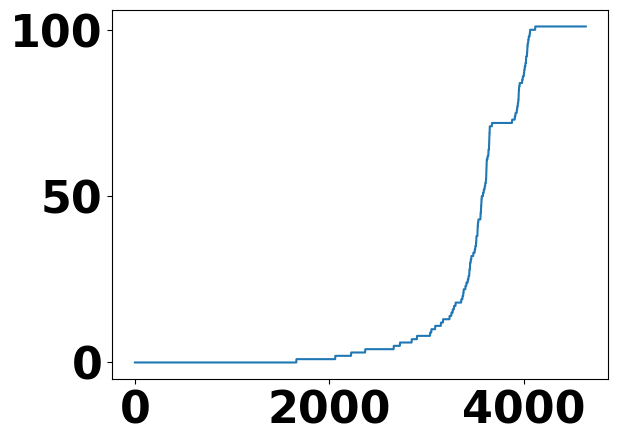

In [433]:
# 4932.YMR207C 
# 4932.YJL052W 
tmp_reco = [] 
for i in rela_counter : 
    tmp_reco.append(i) 


#for ii in tmp_reco : 
all_rela_c = [] 
self_def_commu_pack = [] 
tmp_tar_node = tmp_reco[1432]        #1432     #1987           #### tmp_reco[3334] 
for i in rela_counter[tmp_tar_node] : 
    all_rela_c.append(rela_counter[tmp_tar_node][i]) 
    if rela_counter[tmp_tar_node][i]/len(run_result) >= 0.95 :       # if overlap 95% of times 
        self_def_commu_pack.append(i) 
    elif rela_counter[tmp_tar_node][i]/len(run_result) < 0.95 and 50 <= rela_counter[tmp_tar_node][i]/len(run_result) : # if overlap 50% ~ (95-epsilon)% of times 
        pass 
        
print(c) 
print(len(self_def_commu_pack))           # print("4932.Q0140" in self_def_commu_pack) 

#c = 0 
#d = 0 
#for i in all_rela_c : 
#    if i >= 95 : 
#        c += 1 
#    if i < 90 and i >= 50 : 
#        d += 1 
#print(c , d) 


all_rela_c.sort() 
plt.plot(range(0,len(all_rela_c)) , all_rela_c) 


#### for node  A  , 

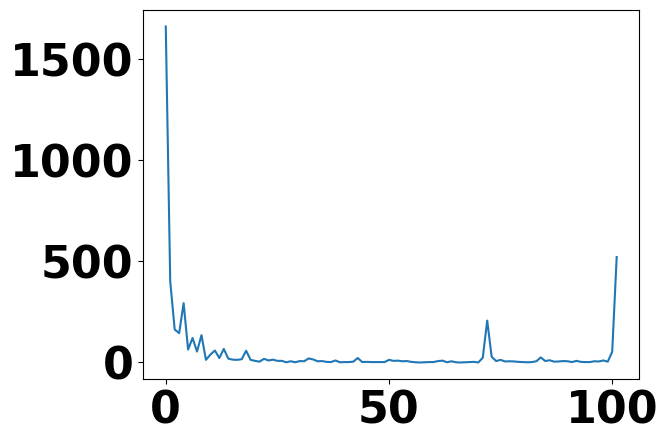

In [350]:
rela_distri = [0]*(1+max(all_rela_c)) 
rela_distri_normal = [] 
for i in all_rela_c : 
    rela_distri[i] += 1 
for i in rela_distri : 
    rela_distri_normal.append(i/sum(rela_distri)) 

tmp_x = [] 
for i in range(len(rela_distri)) : 
    tmp_x.append(i) 

plt.plot(tmp_x , rela_distri) 

#tmp_idx = 0 
#for i in rela_distri : 
#    print(tmp_idx , ":" , i) 
#    tmp_idx += 1 


In [293]:
tmp_raw_commus = run_result[0][0] 

tmp_c = 0 
for i in tmp_raw_commus : 
    if "4932.YMR190C" in i : 
        print(tmp_c) 
        break 
    tmp_c += 1 

print(len(tmp_raw_commus[18])) 

18
291


In [317]:

tmp_G = G.subgraph(tmp_raw_commus[18]) 
#print(nx.betweenness_centrality(tmp_G)["4932.YMR190C"]) 
top_few_btween_member(tmp_G , "4932.YMR190C" , 1) 

[ 4932.YER095W |0.07774866373382486]
[ 4932.YML032C |0.06777401989373975]
[ 4932.YMR190C |0.05996976966270192]
[ 4932.YHL022C |0.04684310753056763]
[ 4932.YBR160W |0.0398670038430141]
#3 	 4932.YMR190C


In [ ]:
for 

4637 4637
4637 4637


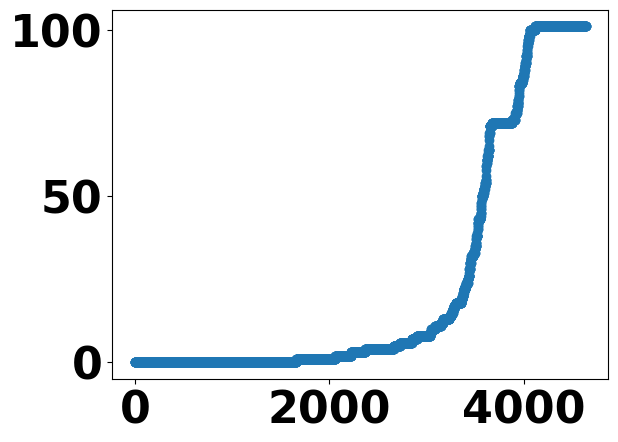

In [461]:


# Set a seed for the random number generator so we get the same random numbers each time
np.random.seed(20210706)

# Create fake x-data
#x = np.arange(10)
x = [] 
for i in range(len(all_rela_c)) : 
    x.append(i) 
#x = np.array(x) 
# Create fake y-data
a = 4.5
b = 0.5
c = 50
#y = a * np.exp(b * x) + c  # Use the second formulation from above
#y = y + np.random.normal(scale=np.sqrt(np.max(y)), size=len(x))  # Add noise
y = [] 
for i in all_rela_c : 
    y.append(i) 

xx = [] 
yy = [] 
for i in range(len(y)) : 
    if y[i] != 0 : 
        xx.append(x[i]) 
        yy.append(y[i]) 

xx = np.array(x) 
yy = np.array(y) 

print(len(x) , len(y)) 
print(len(xx) , len(yy)) 
# Create a plot
ax = plt.axes()
ax.scatter(x, y)
#ax.set_ylim(0, 500)

In [485]:
from scipy.optimize import curve_fit

# Fit the function a * np.exp(b * t) + c to x and y
popt, pcov = curve_fit(lambda t, a, b, c: a * np.exp(b * t) + c, x, y , p0=[1,0,1] , maxfev=800)

In [486]:
a = popt[0]
b = popt[1]
c = popt[2]
print(popt) 

[ 1.58760732e+00  9.67650854e-04 -7.28512042e+00]


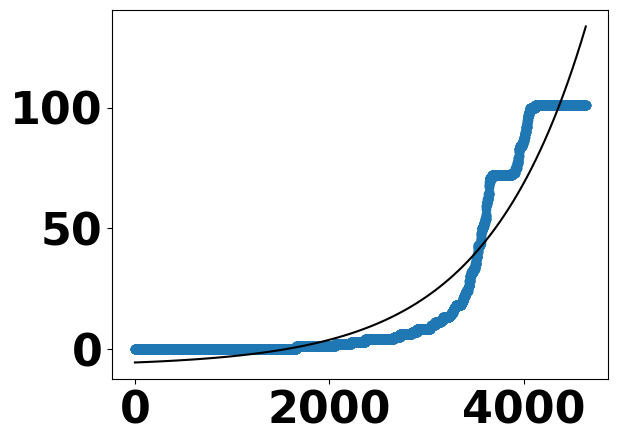

In [487]:
# Create the fitted curve
x_fitted = np.linspace(np.min(x), np.max(x), 100)
y_fitted = a * np.exp(b * x_fitted) + c

# Plot
ax = plt.axes()
ax.scatter(x, y, label='Raw data')
ax.plot(x_fitted, y_fitted, 'k')
#ax.set_ylim(0, 500)

In [454]:
tmp_l = ['A' , 'B' , 'C' , 'D'] 
print(tmp_l) 
tmp_l.remove('A') 
print(tmp_l) 

['A', 'B', 'C', 'D']
['B', 'C', 'D']


In [ ]:
4932.YMR207C
4932.YPR002W
4932.YML056C
4932.YMR213W
4932.YHR150W
4932.YJL052W
4932.YPR022C